In [1]:
!pip install yfinance 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 702.2 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.9-cp38-cp38-macosx_11_0_arm64.whl size=264863 sha256=e1cc03e4ff8736ca155f107ef3afd2f9174a4dc14d8636e2c9fc827e2a0a7d81
  Stored in directory: /Users/shreyashprajapati/Library/Caches/pip/wheels/5f/5b/2b/f993083c828c66707ef9e516072f4b3b41d6c68cf00ab57e77
Successfully built peewee


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch Historical Stock Data (e.g., Apple Stock)
stock_symbol = 'AAPL'  # You can replace this with any stock symbol you want to analyze
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download historical stock data using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Show the first few rows of the dataset
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200
2020-01-07  72.241539  72.849216  72.021223  72.592586  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [3]:
# 1. Calculate Standard Deviation to Measure Volatility
# We will calculate the standard deviation of the stock's closing price over a rolling window
window_size = 20  # You can change the window size to adjust the period for volatility calculation
df['rolling_std'] = df['Close'].rolling(window=window_size).std()


In [4]:
# 2. Calculate Rolling Averages to Detect Stock Trends
# Short-term and Long-term moving averages (SMA)
short_term_window = 50  # 50-day moving average
long_term_window = 200  # 200-day moving average

df['SMA_short_term'] = df['Close'].rolling(window=short_term_window).mean()
df['SMA_long_term'] = df['Close'].rolling(window=long_term_window).mean()

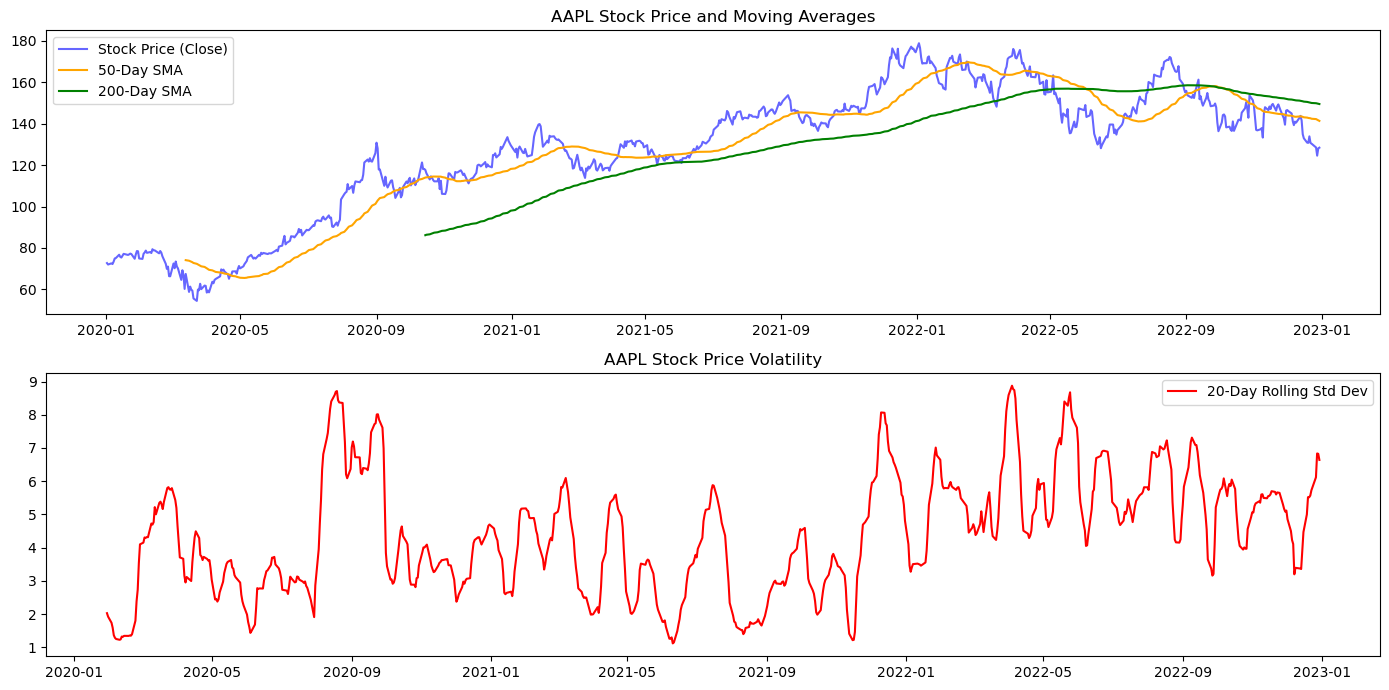


Latest Stock Price: Ticker
AAPL    128.436661
Name: 2022-12-30 00:00:00, dtype: float64
Latest 20-Day Rolling Volatility: 6.640131945707196
Latest 50-Day SMA: 141.37819885253907
Latest 200-Day SMA: 149.52099739074708

Stock is in a Downtrend (Short-term SMA is below Long-term SMA).


In [5]:
# 3. Visualize Stock Price, Volatility, and Trends

plt.figure(figsize=(14, 7))

# Plot Stock Price, Short-Term and Long-Term Moving Averages
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Stock Price (Close)', color='blue', alpha=0.6)
plt.plot(df['SMA_short_term'], label=f'{short_term_window}-Day SMA', color='orange')
plt.plot(df['SMA_long_term'], label=f'{long_term_window}-Day SMA', color='green')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.legend(loc='best')

# Plot Volatility (Standard Deviation)
plt.subplot(2, 1, 2)
plt.plot(df['rolling_std'], label=f'{window_size}-Day Rolling Std Dev', color='red')
plt.title(f'{stock_symbol} Stock Price Volatility')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Calculate and Print Final Volatility and Trend Information
latest_volatility = df['rolling_std'].iloc[-1]
latest_price = df['Close'].iloc[-1]
short_term_sma_latest = df['SMA_short_term'].iloc[-1]
long_term_sma_latest = df['SMA_long_term'].iloc[-1]

print(f"\nLatest Stock Price: {latest_price}")
print(f"Latest {window_size}-Day Rolling Volatility: {latest_volatility}")
print(f"Latest {short_term_window}-Day SMA: {short_term_sma_latest}")
print(f"Latest {long_term_window}-Day SMA: {long_term_sma_latest}")

# Checking for Trend Indicators
if short_term_sma_latest > long_term_sma_latest:
    print(f"\nStock is in an Uptrend (Short-term SMA is above Long-term SMA).")
else:
    print(f"\nStock is in a Downtrend (Short-term SMA is below Long-term SMA).")